<a href="https://www.kaggle.com/code/azminetoushikwasi/extended-eda-goals-cristiano-ronaldo?scriptVersionId=95739988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CR7 - Extensive EDA & Analytics - Cristiano Ronaldo - All Club Goals Stats

**Cristiano Ronaldo dos Santos Aveiro** is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and captains the Portugal national team.
 
- Current team: Portugal national football team (#7 / Forward) Trending
                                               
- Born: February 5, 1985 (age 37 years), Hospital Dr. Nélio Mendonça, Funchal, Portugal
- Height: 1.87 m
- Partner: Georgina Rodríguez (2017–)
- Salary: 26.52 million GBP (2022)
- Children: Cristiano Ronaldo Jr., Alana Martina dos Santos Aveiro, Eva Maria Dos Santos, Mateo Ronaldo



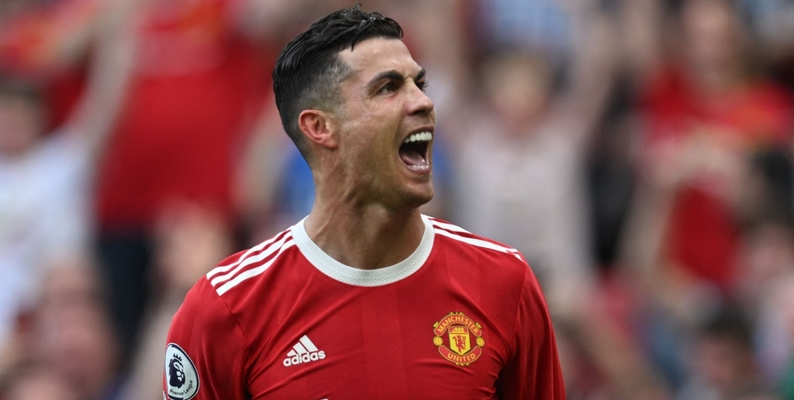

# Data Loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv


In [2]:
df=pd.read_csv("/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv")

# Basic Exploration

In [3]:
df.head()

,id,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                698 non-null    int64 
 1   Season            698 non-null    object
 2   Competition       698 non-null    object
 3   Matchday          698 non-null    object
 4   Date              698 non-null    object
 5   Venue             698 non-null    object
 6   Club              698 non-null    object
 7   Opponent          698 non-null    object
 8   Result            698 non-null    object
 9   Playing_Position  641 non-null    object
 10  Minute            698 non-null    object
 11  At_score          698 non-null    object
 12  Type              683 non-null    object
 13  Goal_assist       458 non-null    object
dtypes: int64(1), object(13)
memory usage: 76.5+ KB


# Exploritory Data Analysis

## Goals per competition

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per competition')

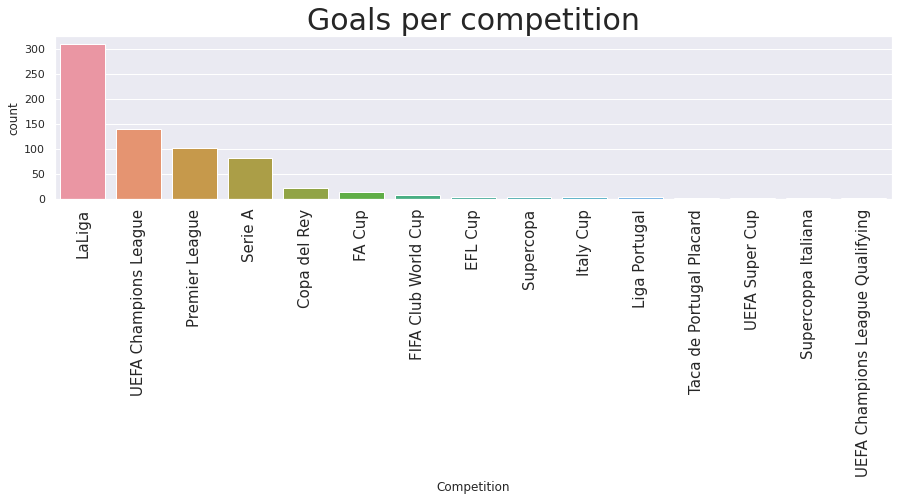

In [5]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],order=df.Competition.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per competition",fontsize=30)

## Goals per season

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per season')

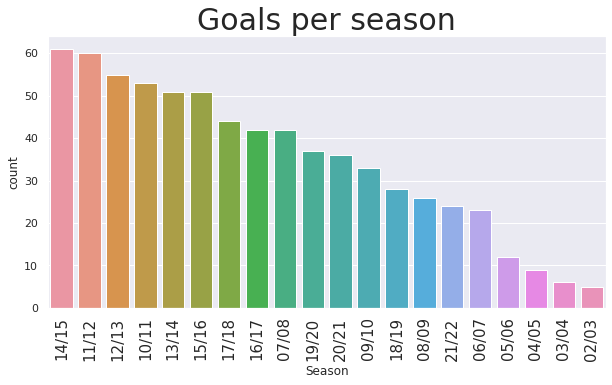

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'),order=df.Season.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per season",fontsize=30)

## Goals per Clubs

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Clubs Played')

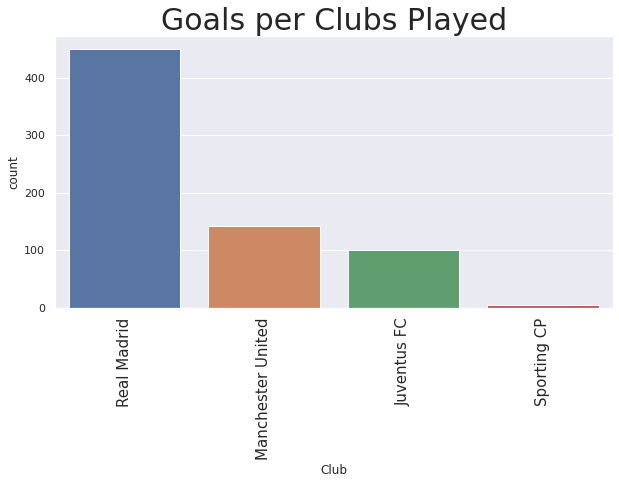

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Club'],hue_order=df.groupby('Club'),order=df.Club.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Clubs Played",fontsize=30)

<AxesSubplot:title={'center':'Goals per Clubs Played'}, ylabel='Club'>

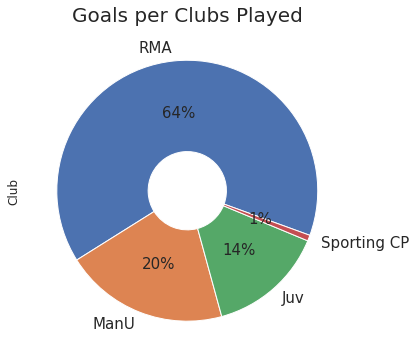

In [8]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Club.value_counts().plot(kind='pie', labels=['RMA','ManU','Juv', 'Sporting CP'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## Goals per playing Position

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Playing Position')

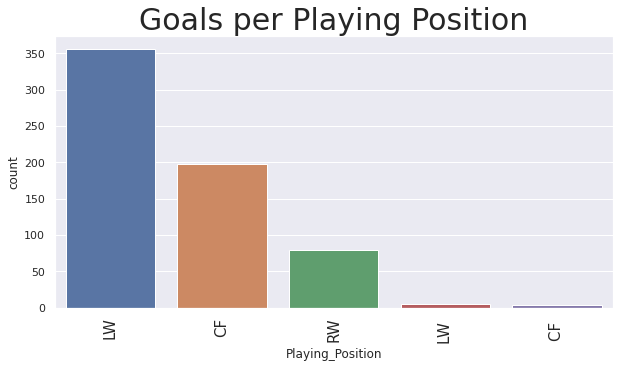

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],hue_order=df.groupby('Competition'),order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)

## Goals per Game Minute

In [10]:
mins=list(map(str, range(1,120)))
for min in df['Minute']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Game Minute (1-27)')

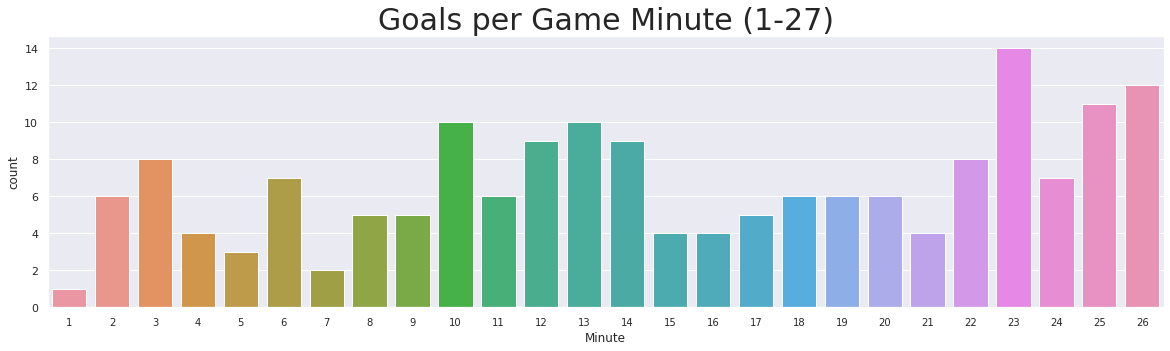

In [11]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-27)",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Game Minute (28-54)')

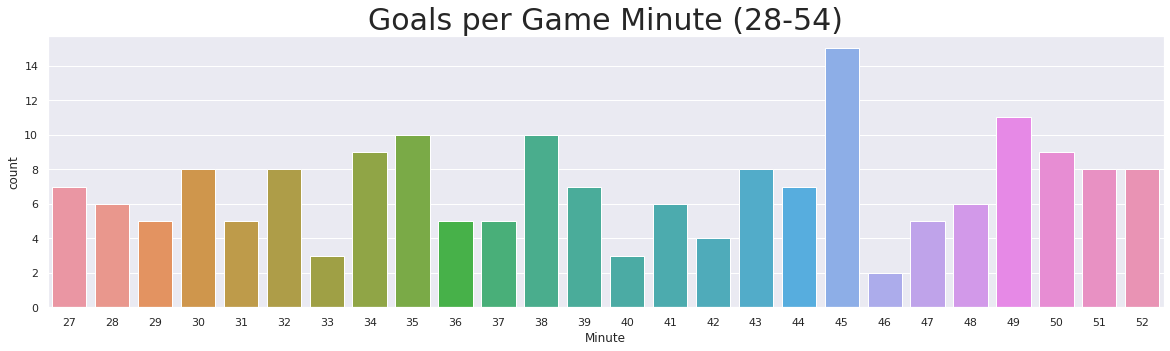

In [12]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (28-54)",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Game Minute (55-81)')

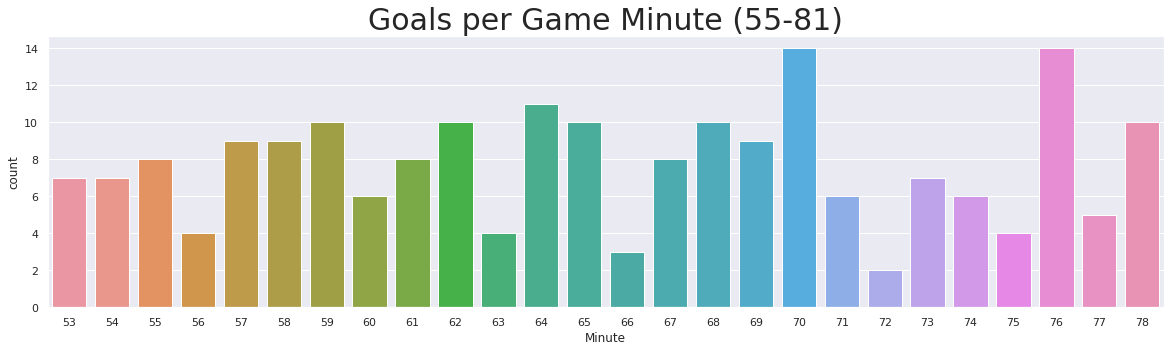

In [13]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (55-81)",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Game Minute 82-108)')

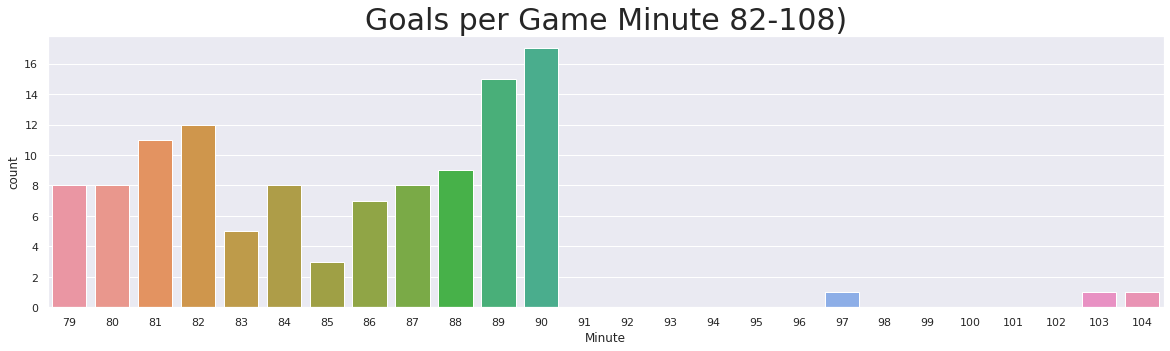

In [14]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute 82-108)",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Game Minute (109-Exttra times)')

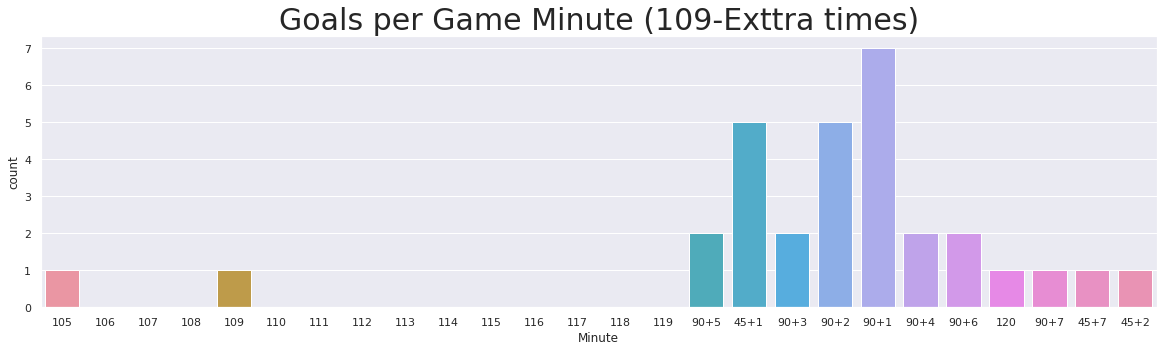

In [15]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (109-Exttra times)",fontsize=30)

## Goals per Type_of_goal

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Type of goal scored')

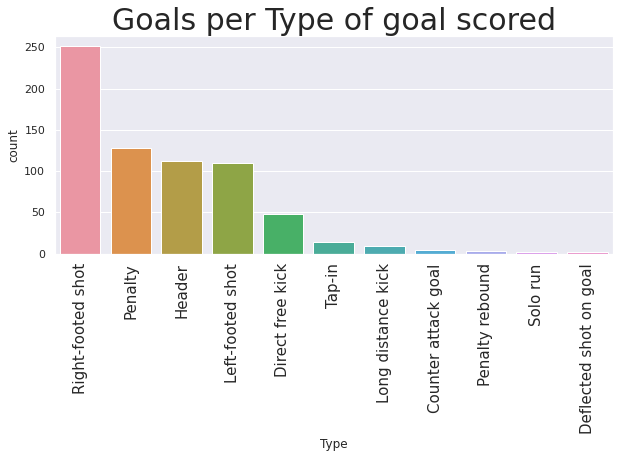

In [16]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type'],hue_order=df.groupby('Type'),order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Type of goal scored",fontsize=30)

## Scoreline after goal

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoresheet after scoring')

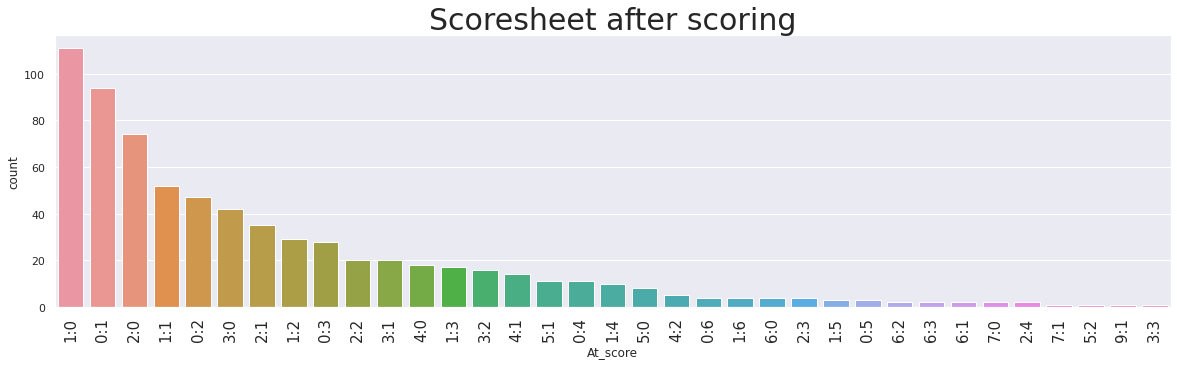

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

## Opponents

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponent')

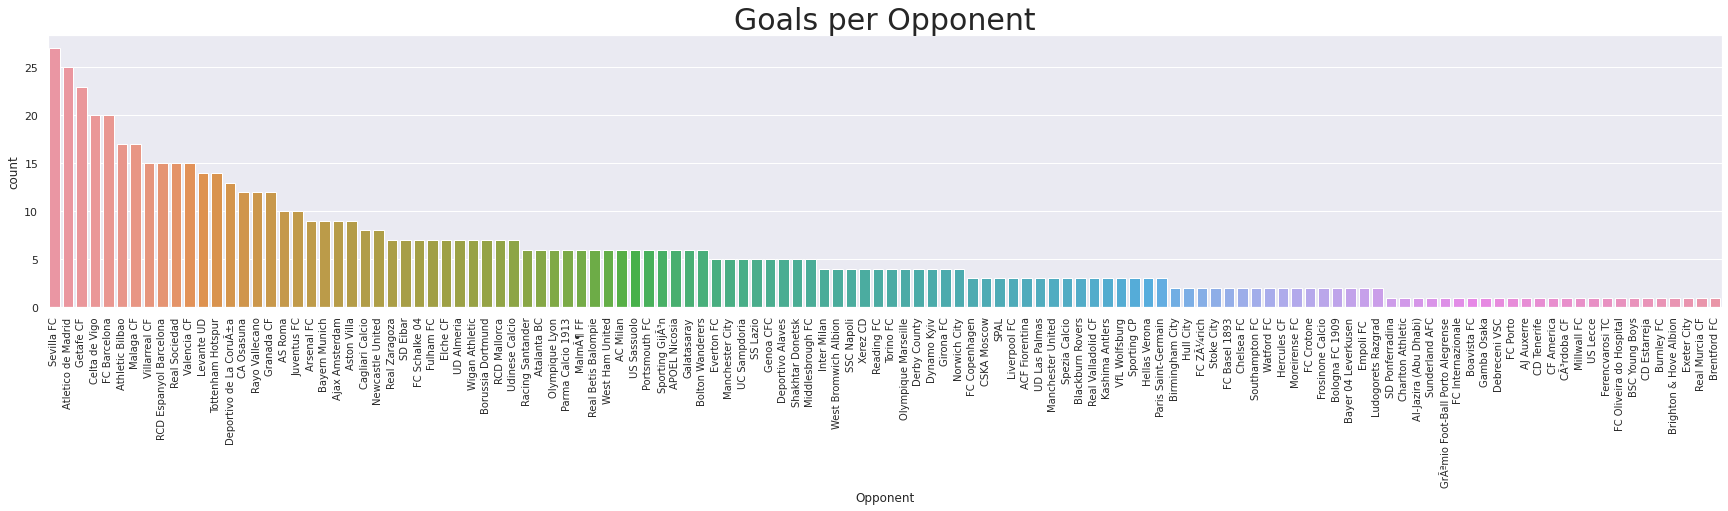

In [18]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

In [19]:
mins=list(map(str, df.Opponent.value_counts().sort_values(ascending=False).index))
for min in df['Opponent']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

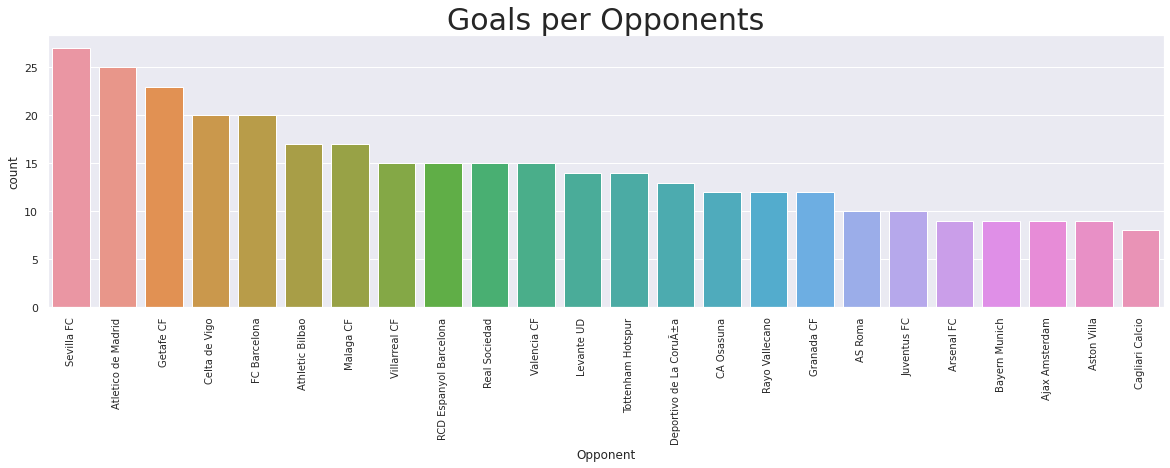

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins1)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

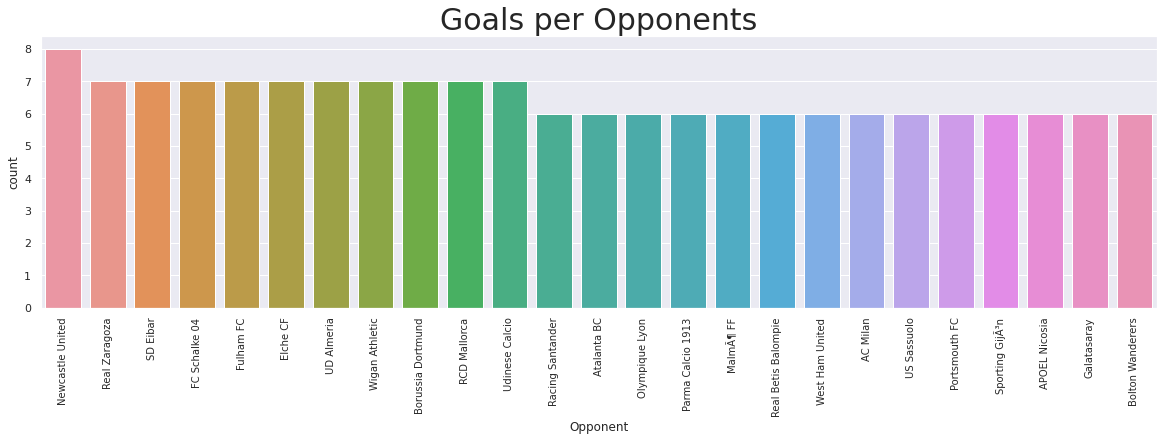

In [21]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins2)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

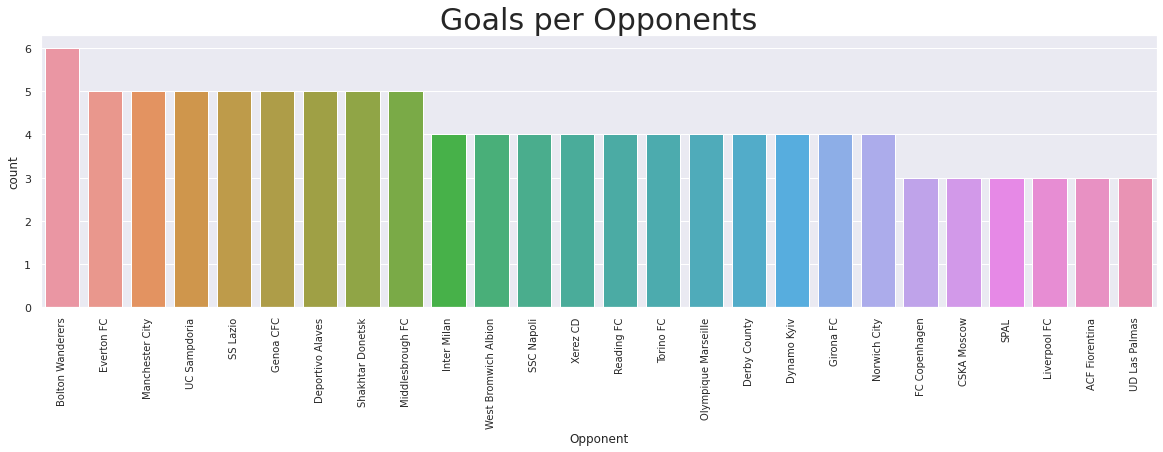

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins3)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

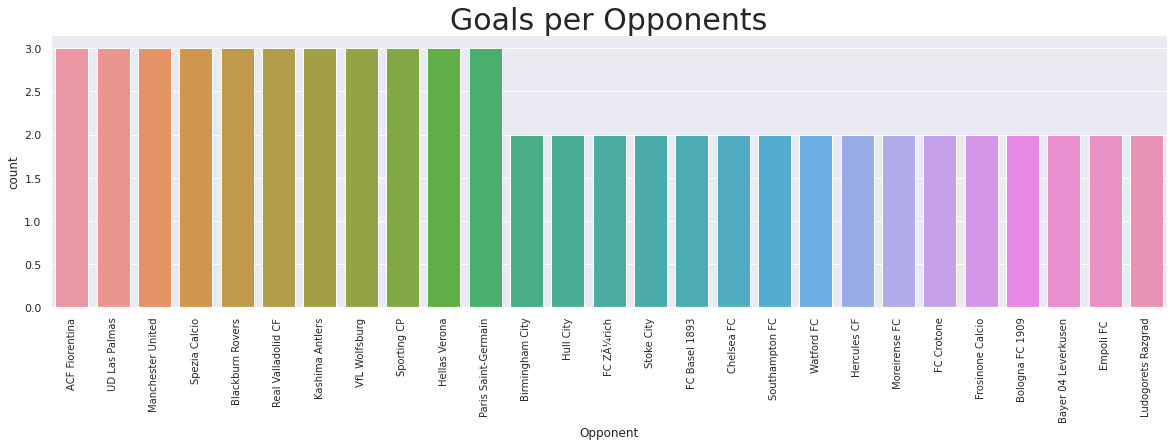

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins4)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

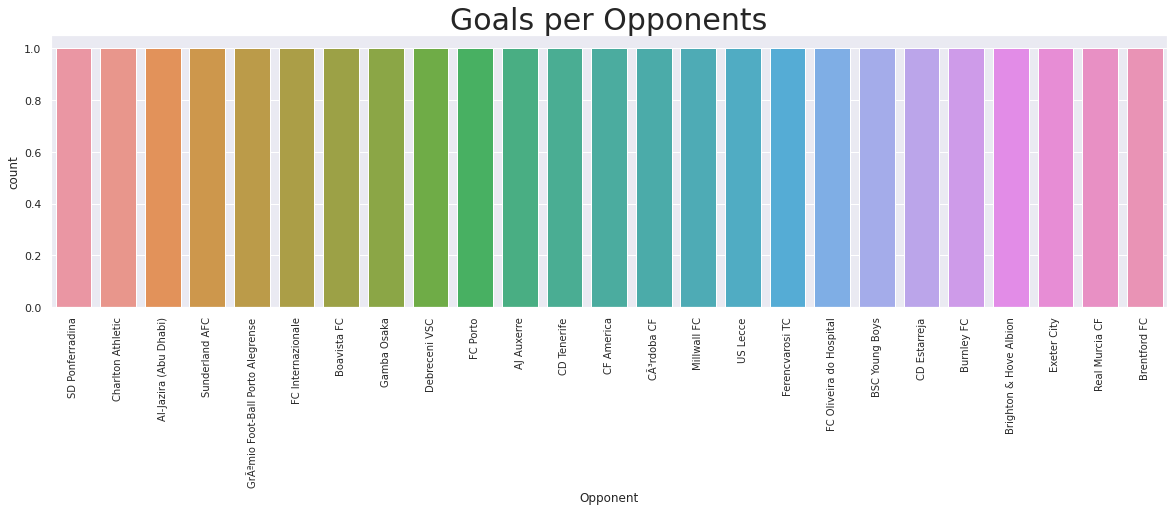

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins5)
p.axes.set_title("Goals per Opponents",fontsize=30)

## Favourite Opponents

<BarContainer object of 7 artists>

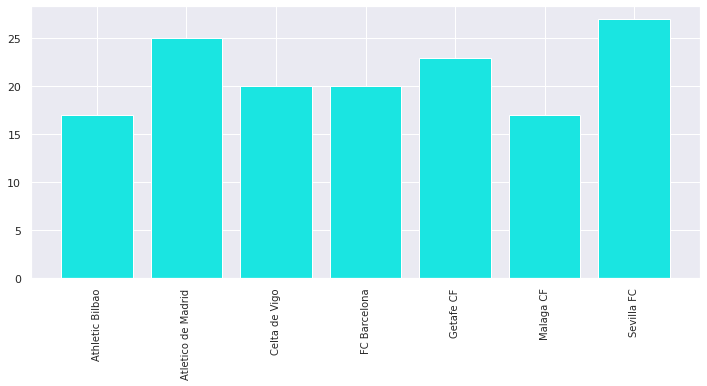

In [25]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")


## Assist

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals Assist')

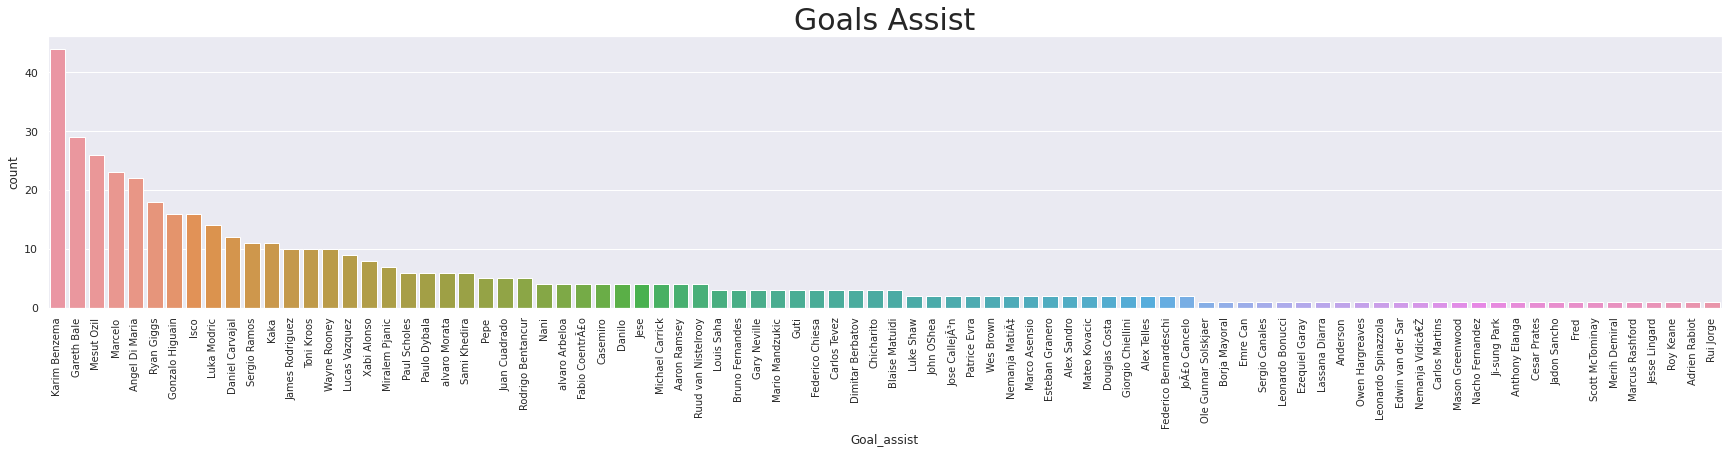

In [26]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

In [27]:
mins=list(map(str, df.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df['Goal_assist']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

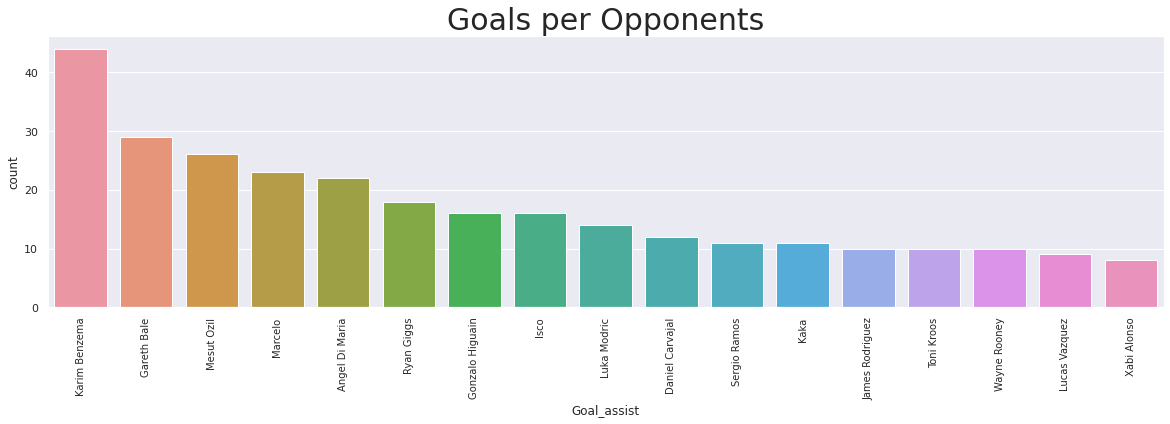

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins1)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

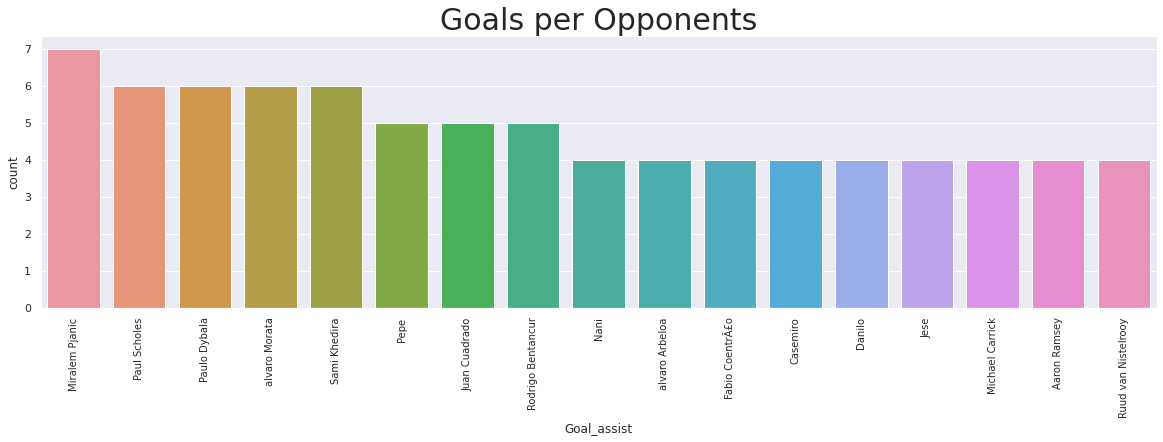

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins2)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

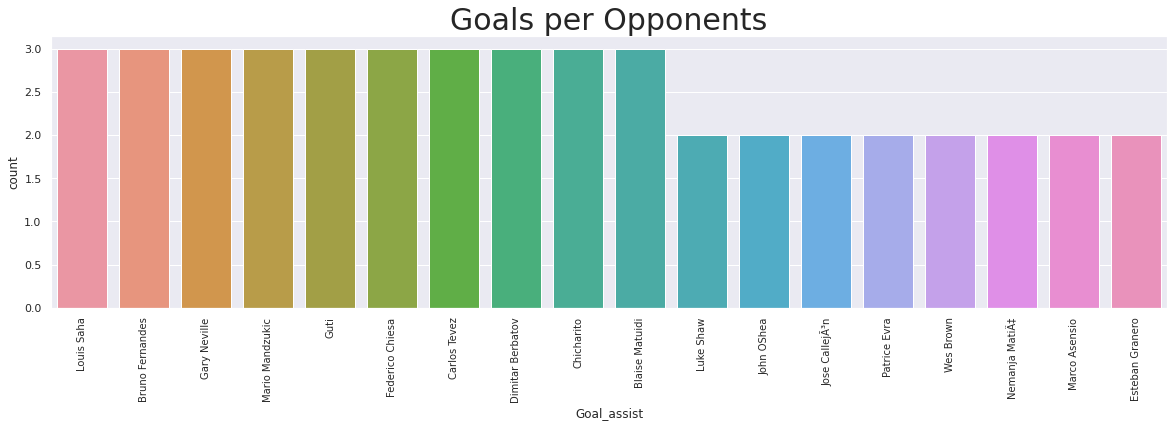

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins3)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

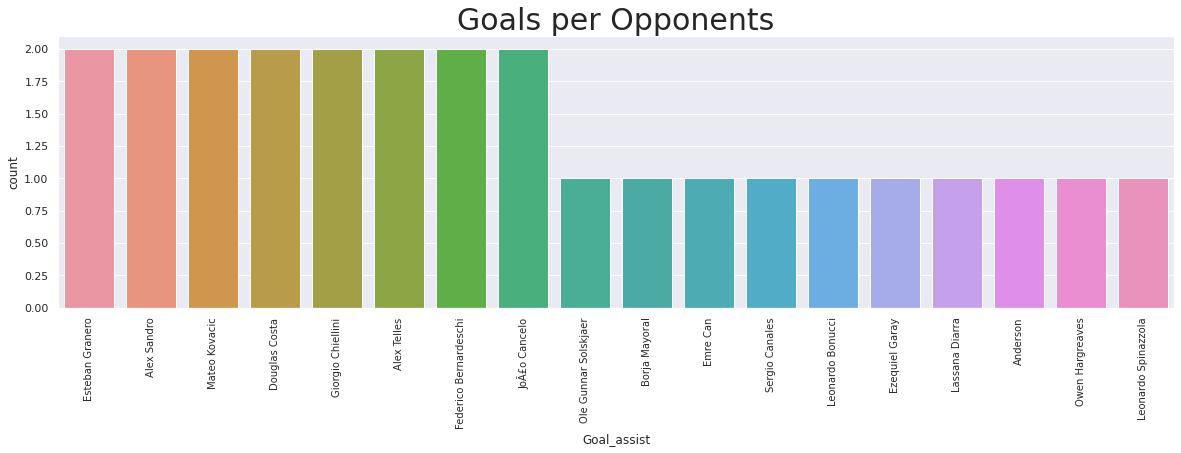

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins4)
p.axes.set_title("Goals per Opponents",fontsize=30)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponents')

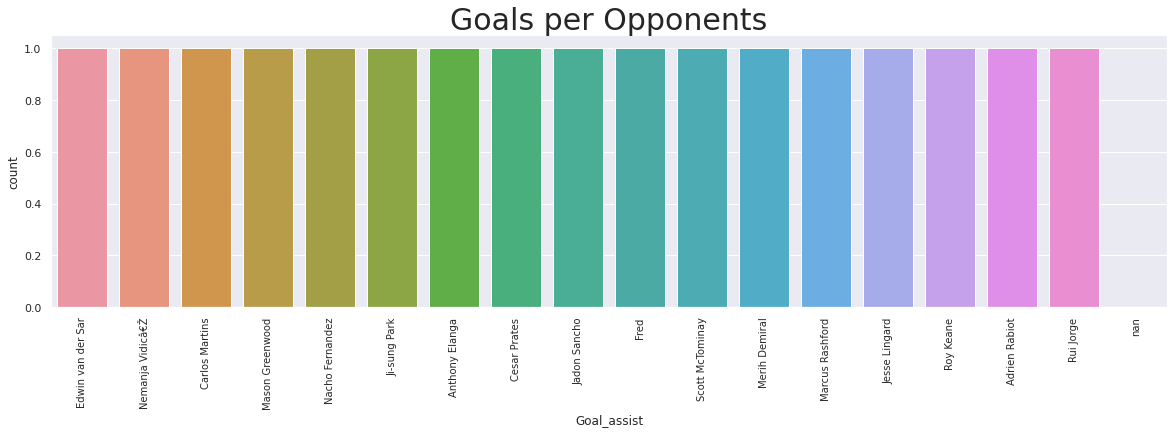

In [32]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins5)
p.axes.set_title("Goals per Opponents",fontsize=30)

## Home - Away goals

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

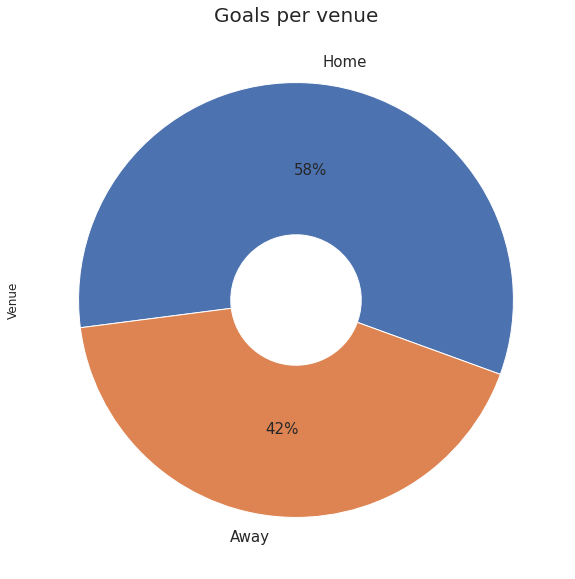

In [33]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [34]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


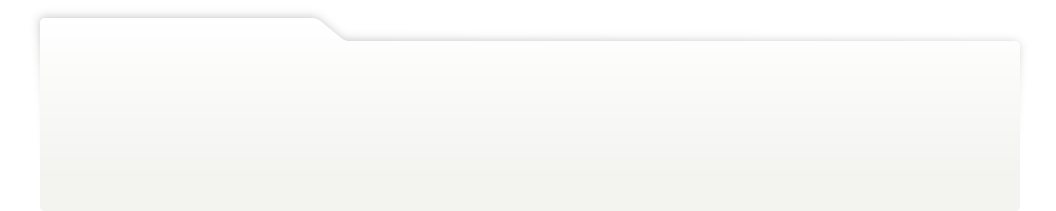
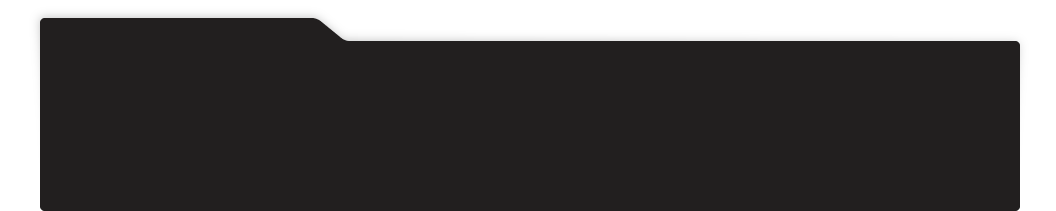
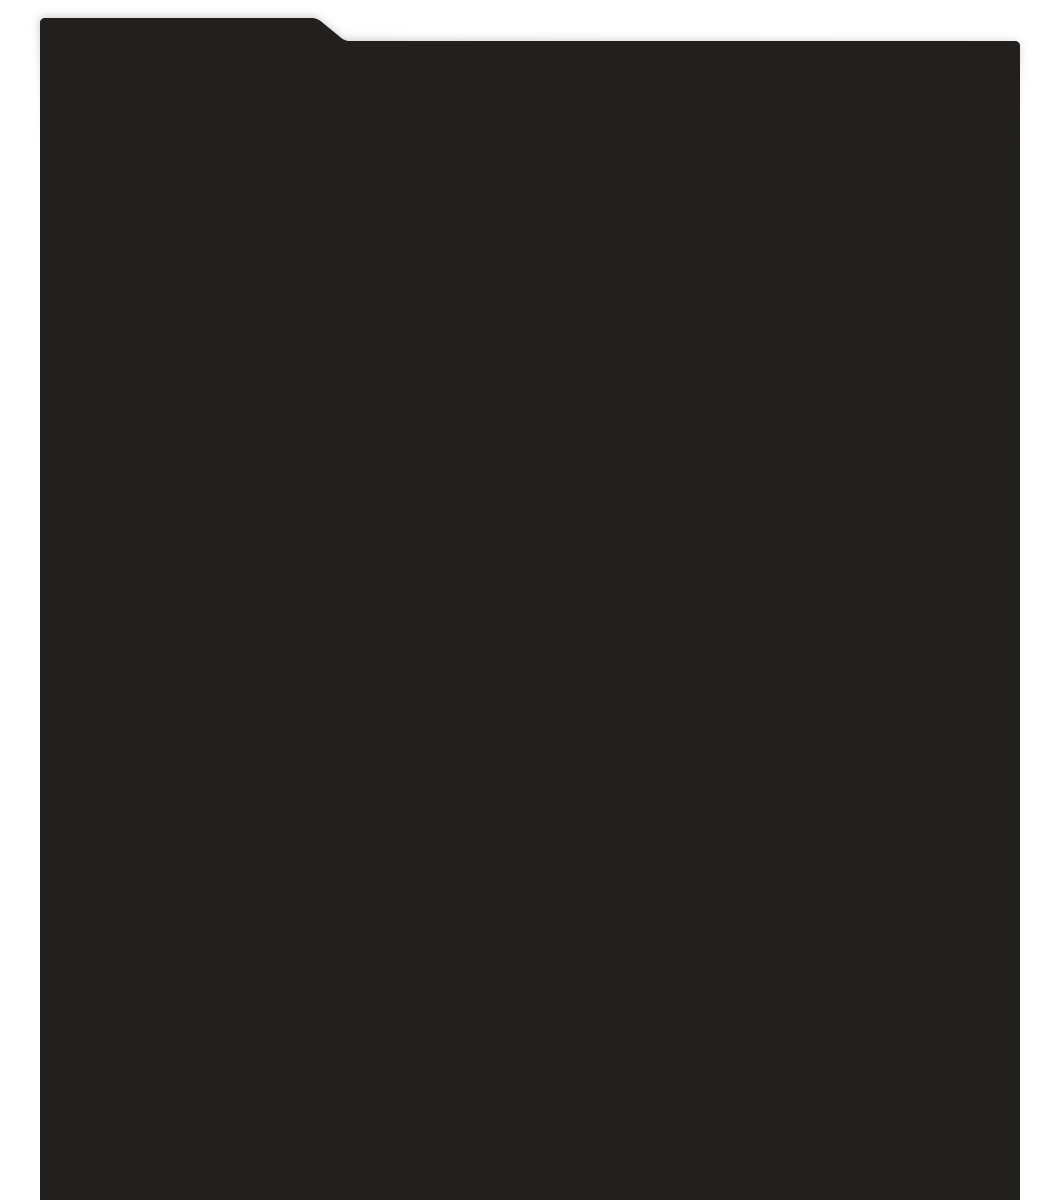
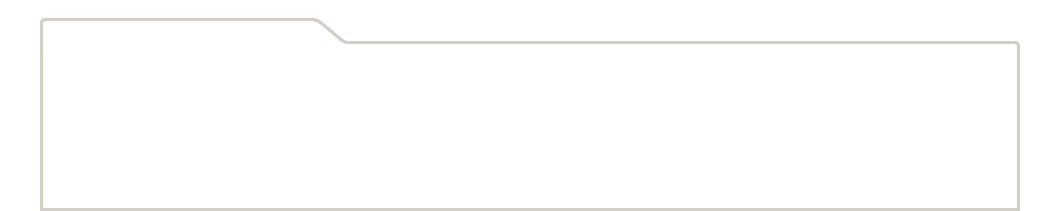
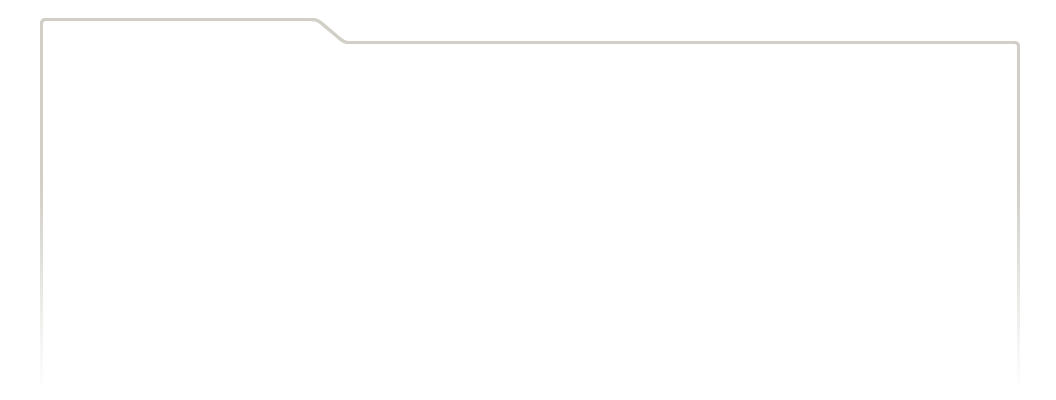
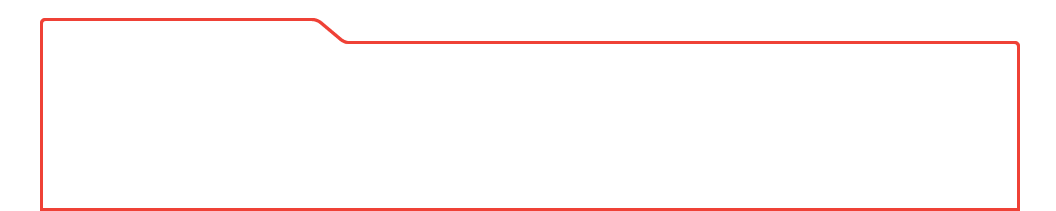
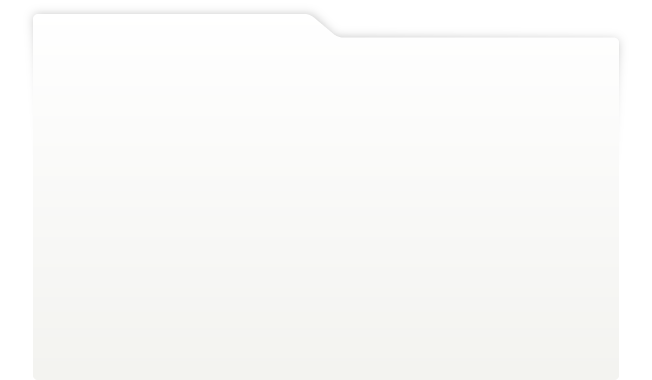
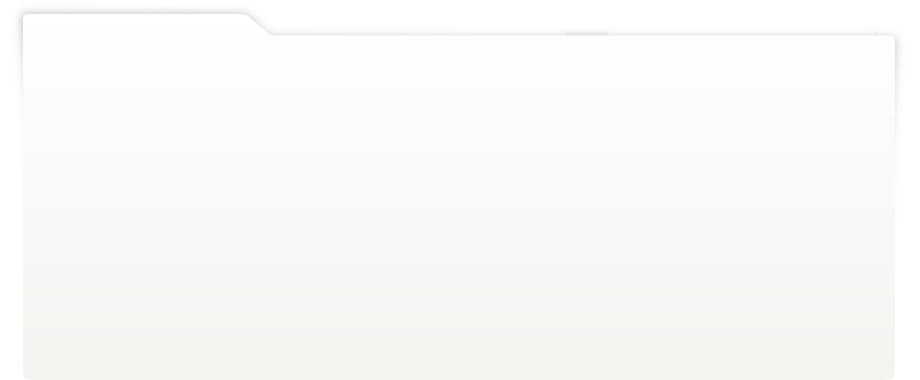
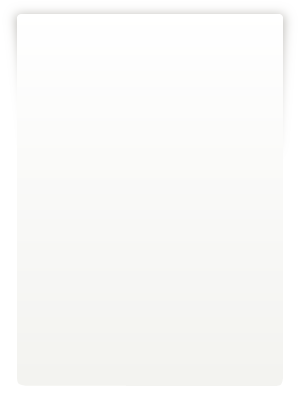
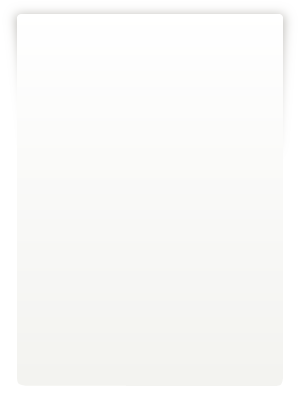
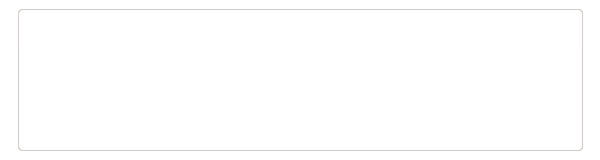
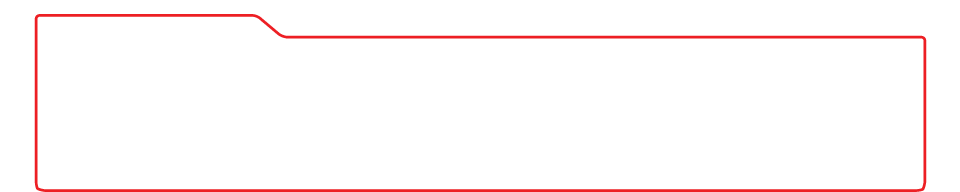
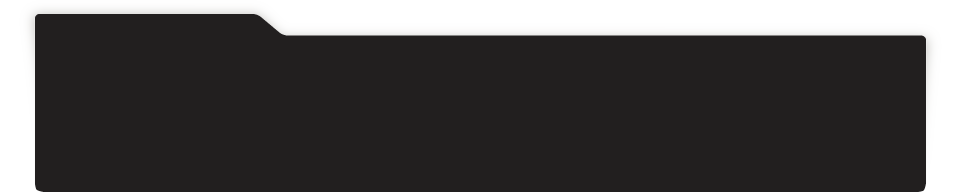
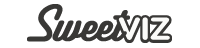
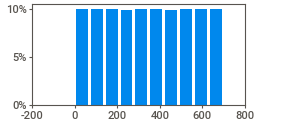
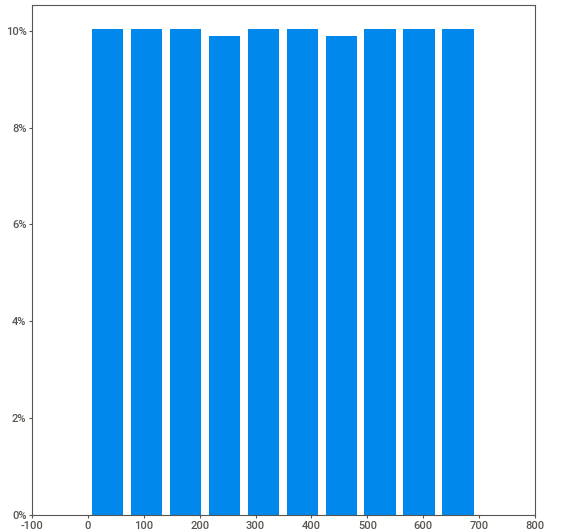
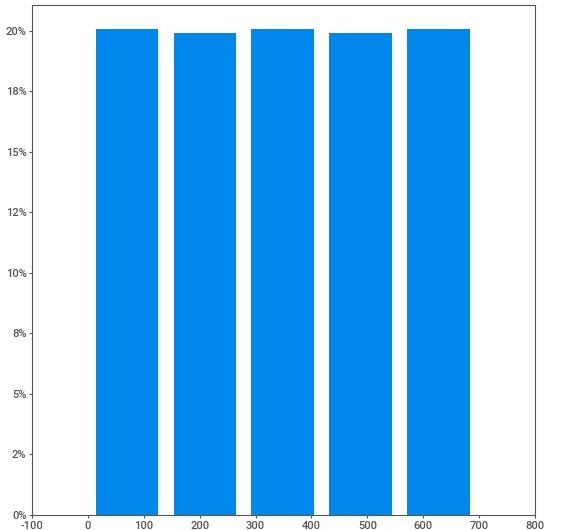
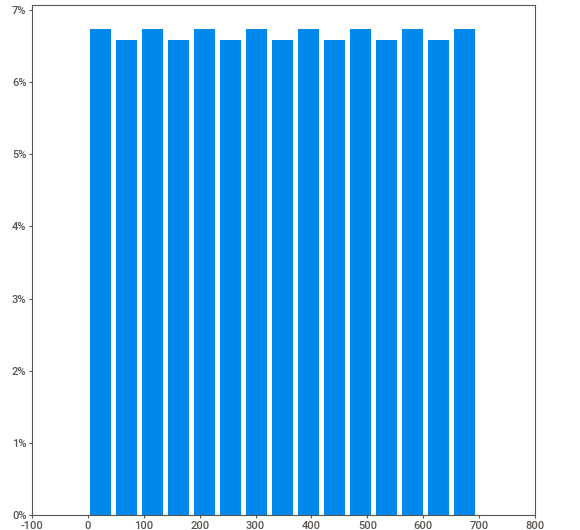
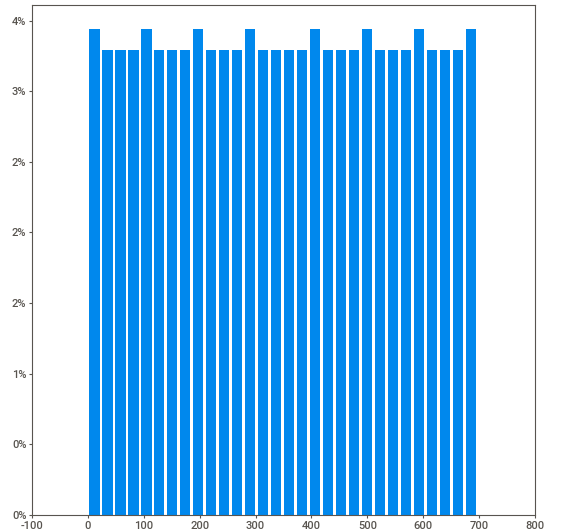
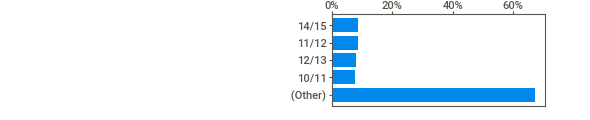
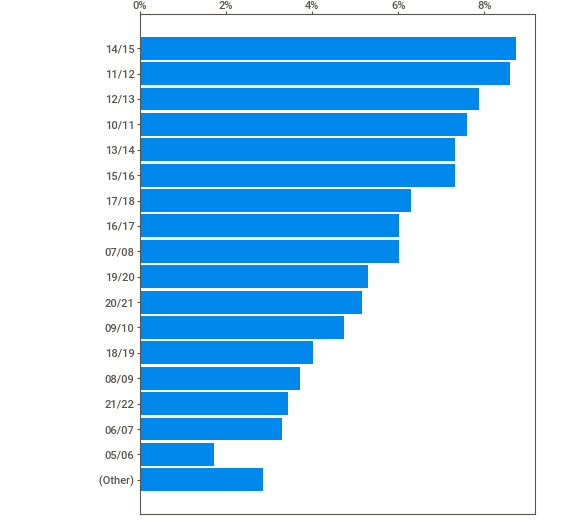
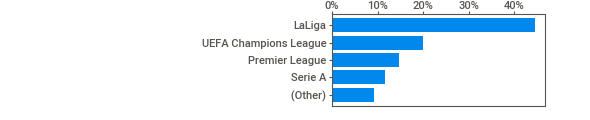
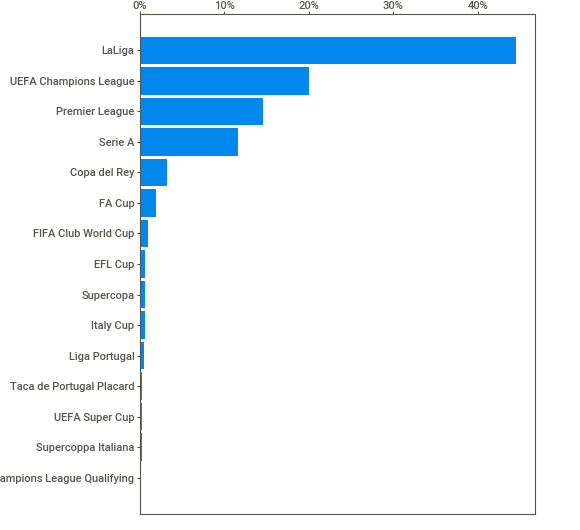
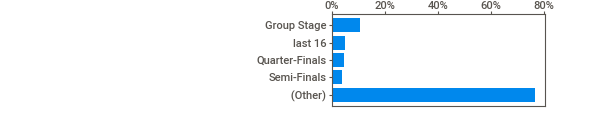
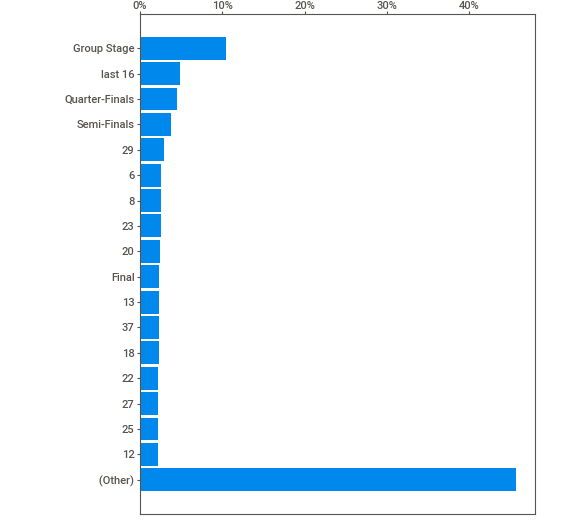
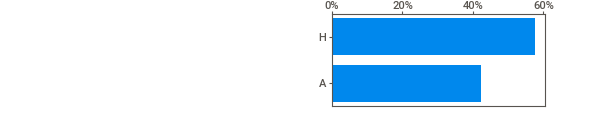
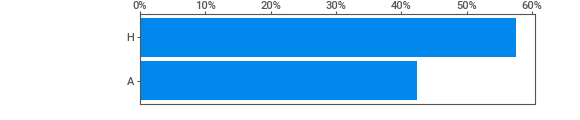
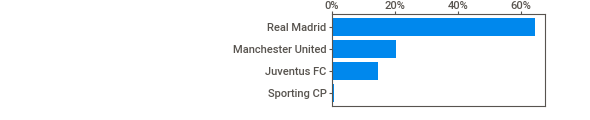
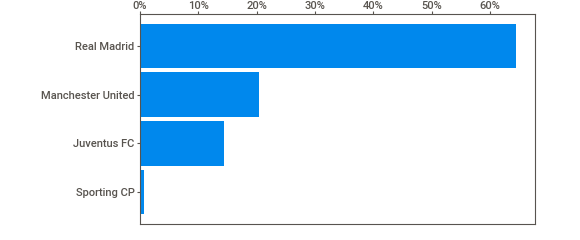
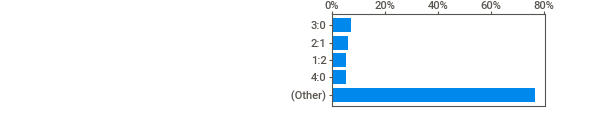
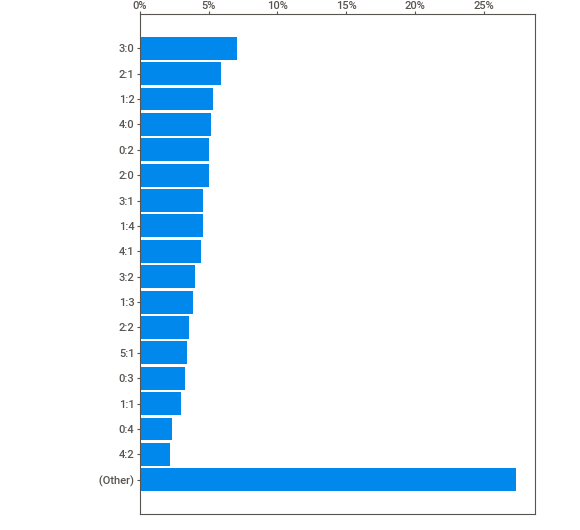
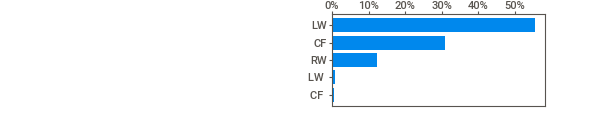
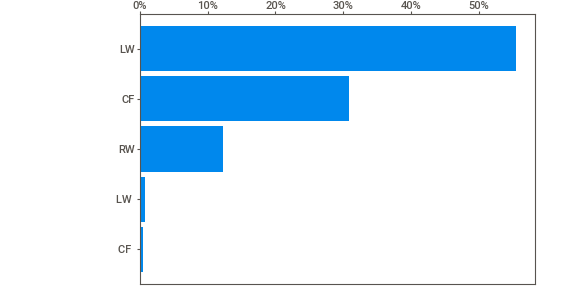
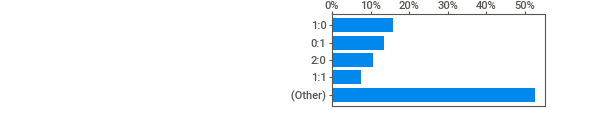
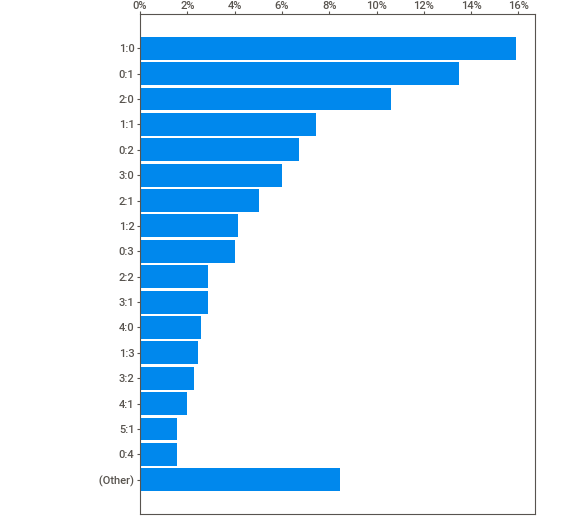
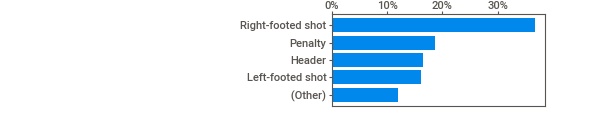
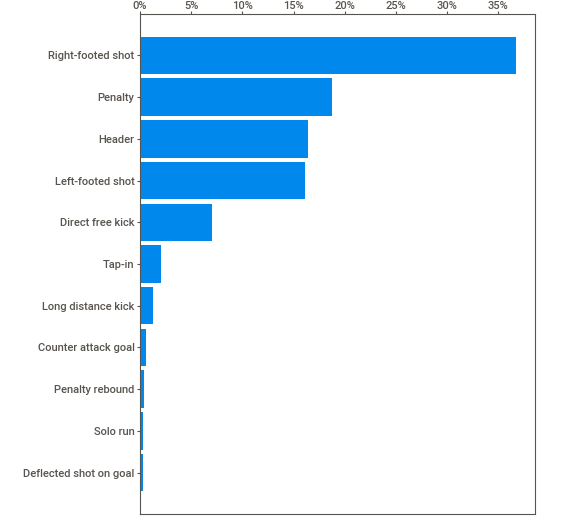
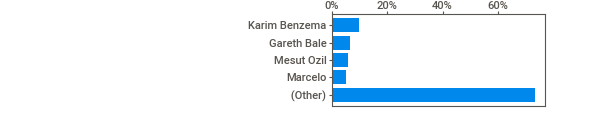
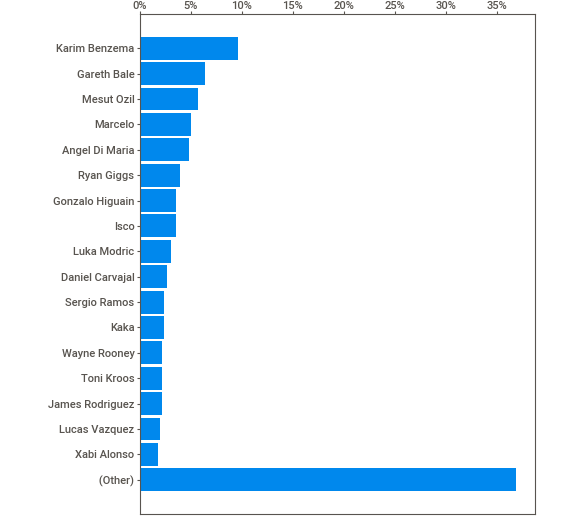
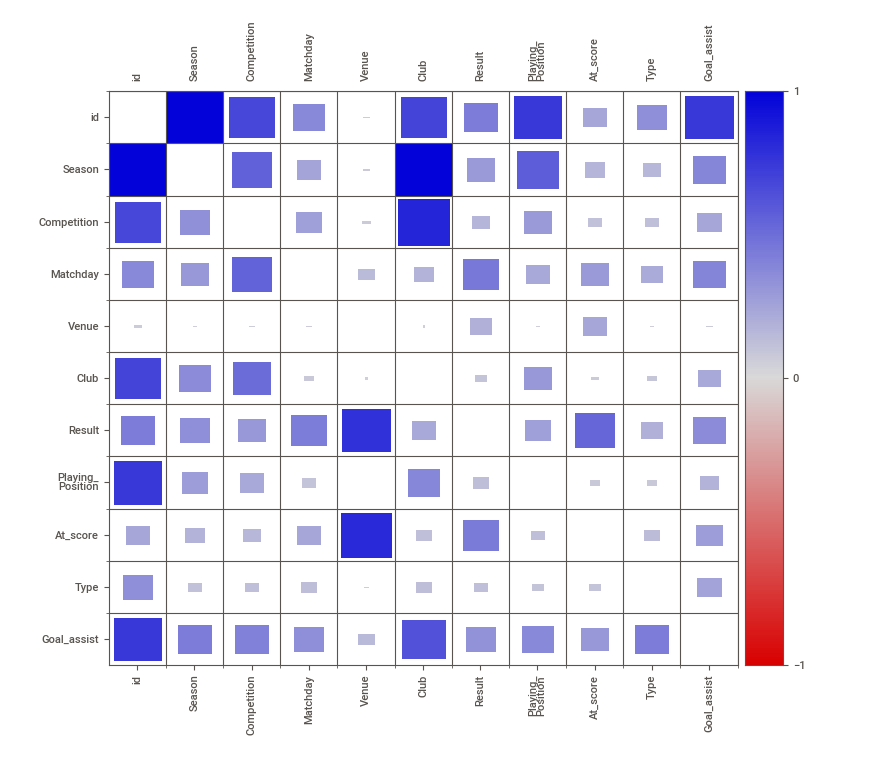
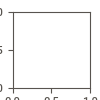

In [35]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

# More coming soon